In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
res_5_df = pd.read_csv('results_1.5.csv')

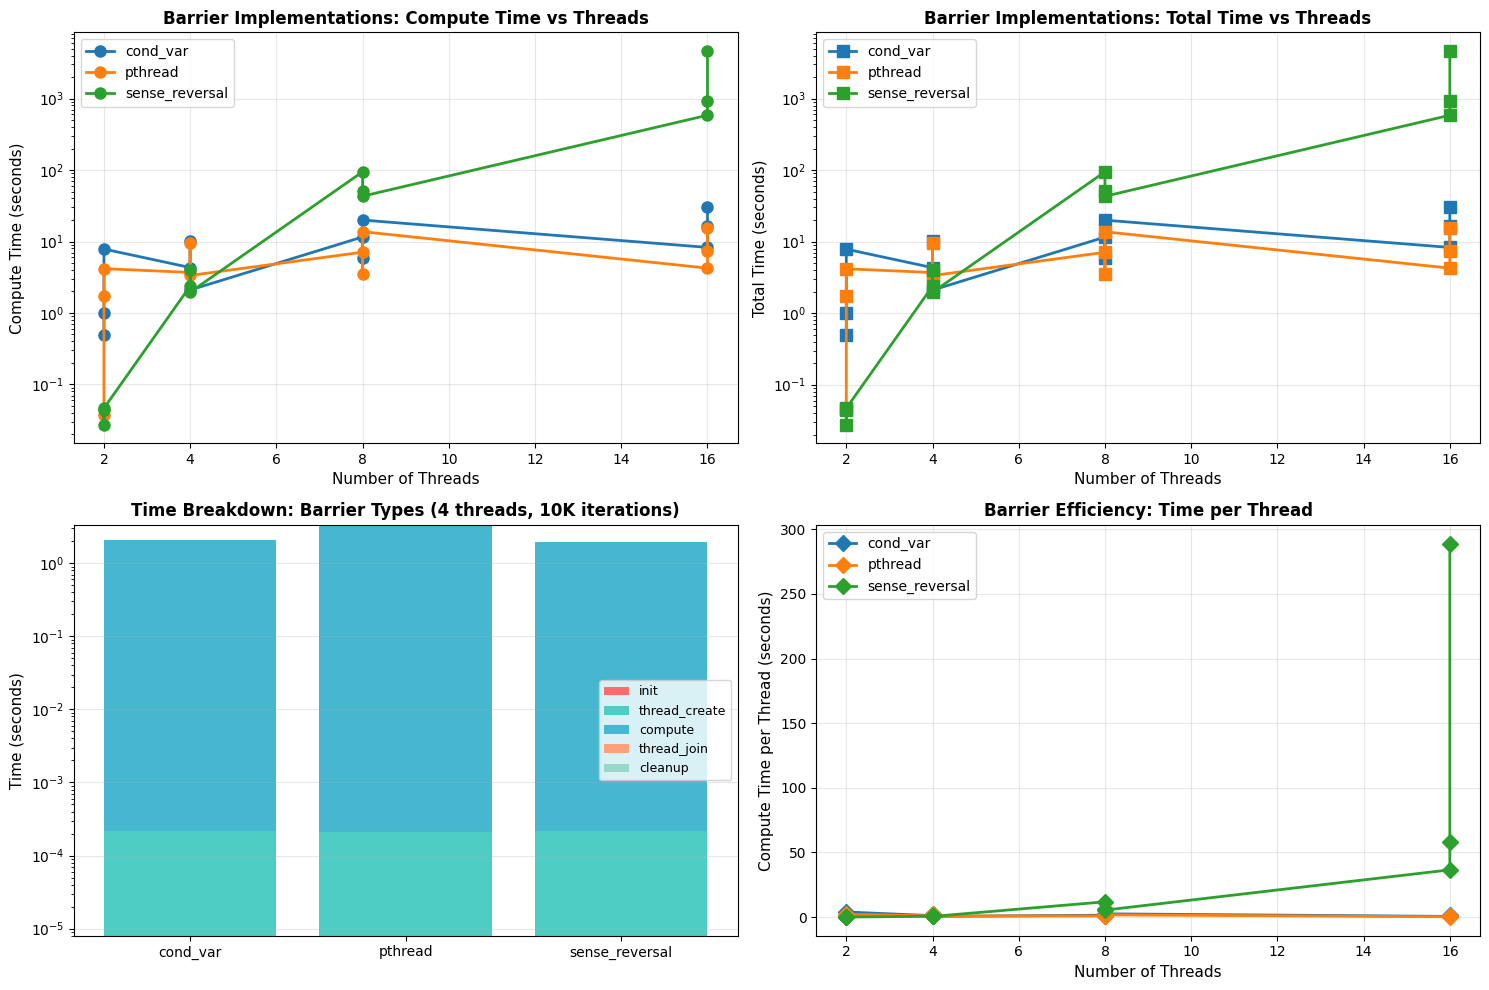

Barrier Implementations Summary:
  cond_var: Best config - 2 threads, 0.492985s
  pthread: Best config - 2 threads, 0.045593s
  sense_reversal: Best config - 2 threads, 0.027672s


In [3]:
# 1.5 Barrier Implementations Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

barrier_types = sorted(res_5_df['barrier_type'].unique())
iterations_list = sorted(res_5_df['iterations'].unique())
threads_list = sorted(res_5_df['threads'].unique())

# Compute time vs thread count
for barrier in barrier_types:
    barrier_data = res_5_df[res_5_df['barrier_type'] == barrier].copy()
    barrier_data = barrier_data.sort_values('threads')
    axes[0, 0].plot(barrier_data['threads'], barrier_data['time_compute'], 
                   marker='o', linewidth=2, markersize=8, label=barrier)

axes[0, 0].set_xlabel('Number of Threads', fontsize=11)
axes[0, 0].set_ylabel('Compute Time (seconds)', fontsize=11)
axes[0, 0].set_title('Barrier Implementations: Compute Time vs Threads', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# Total time comparison
for barrier in barrier_types:
    barrier_data = res_5_df[res_5_df['barrier_type'] == barrier].copy()
    barrier_data = barrier_data.sort_values('threads')
    axes[0, 1].plot(barrier_data['threads'], barrier_data['time_total'], 
                   marker='s', linewidth=2, markersize=8, label=barrier)

axes[0, 1].set_xlabel('Number of Threads', fontsize=11)
axes[0, 1].set_ylabel('Total Time (seconds)', fontsize=11)
axes[0, 1].set_title('Barrier Implementations: Total Time vs Threads', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

# Time breakdown for 4 threads
four_thread_data = res_5_df[res_5_df['threads'] == 4]
time_comps_5 = ['time_init', 'time_thread_create', 'time_compute', 'time_thread_join', 'time_cleanup']
colors_5 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

x_pos_5 = np.arange(len(barrier_types))
bottom_5 = np.zeros(len(barrier_types))

for idx, comp in enumerate(time_comps_5):
    values = [four_thread_data[four_thread_data['barrier_type'] == b][comp].values[0] 
              for b in barrier_types]
    axes[1, 0].bar(x_pos_5, values, bottom=bottom_5, label=comp.replace('time_', ''), color=colors_5[idx])
    bottom_5 += np.array(values)

axes[1, 0].set_ylabel('Time (seconds)', fontsize=11)
axes[1, 0].set_title('Time Breakdown: Barrier Types (4 threads, 10K iterations)', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos_5)
axes[1, 0].set_xticklabels(barrier_types)
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_yscale('log')

# Efficiency: compute time per thread
efficiency_data = []
for barrier in barrier_types:
    barrier_data = res_5_df[res_5_df['barrier_type'] == barrier].copy()
    barrier_data = barrier_data.sort_values('threads')
    barrier_data['efficiency'] = barrier_data['time_compute'] / barrier_data['threads']
    efficiency_data.append(barrier_data)

for barrier, data in zip(barrier_types, efficiency_data):
    axes[1, 1].plot(data['threads'], data['efficiency'], 
                   marker='D', linewidth=2, markersize=8, label=barrier)

axes[1, 1].set_xlabel('Number of Threads', fontsize=11)
axes[1, 1].set_ylabel('Compute Time per Thread (seconds)', fontsize=11)
axes[1, 1].set_title('Barrier Efficiency: Time per Thread', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Barrier Implementations Summary:")
for barrier in barrier_types:
    best_config = res_5_df[res_5_df['barrier_type'] == barrier].nsmallest(1, 'time_total')
    print(f"  {barrier}: Best config - {best_config['threads'].values[0]} threads, {best_config['time_total'].values[0]:.6f}s")